# Análise Exploratória - Variável TimeFixBug
bug-fixing time (dependent): the total amount of time required to fix a bug.

# Importações

In [61]:
#Manipulação de Dados
import pandas as pd
import numpy as np
from datetime import datetime
import duckdb

import math

#Visualização de Dados
import matplotlib.pyplot as plt
import seaborn as sb
#from pandas_profiling import ProfileReport


In [2]:
# Permitir exibição dos plots no Jupyter Notebook
%matplotlib inline

In [3]:
# Exibir todas as colunas no head
pd.set_option('display.max_columns', None)

# Carregamento dos Dados

In [14]:
# changelog_file = pd.read_csv("../data/raw/new_changelog_file.csv", sep = ",")
commit_file = pd.read_csv("../data/raw/new_commit_file.csv", sep = ";")
comment_file = pd.read_csv("../data/raw/new_comment_file.csv", sep = ";")
final_list_of_contributors = pd.read_csv("../data/raw/final_list_of_contributors_after.csv", sep = ";")
snapshot_file = pd.read_csv("../data/raw/new_snapshot_file.csv", sep = ";")


# Tranformações e Manipulações de Dados

In [17]:
snapshot_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10375 entries, 0 to 10374
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Project                    10375 non-null  object
 1   Owner                      10375 non-null  object
 2   Manager                    10375 non-null  object
 3   Category                   10375 non-null  object
 4   Key                        10375 non-null  object
 5   Priority                   10375 non-null  object
 6   Status                     10375 non-null  object
 7   Reporter                   10375 non-null  object
 8   Assignee                   10375 non-null  object
 9   Components                 7044 non-null   object
 10  SummaryTopWords            10302 non-null  object
 11  DescriptionTopWords        10004 non-null  object
 12  CommentsTopWords           10359 non-null  object
 13  CreationDate               10375 non-null  object
 14  Resolu

In [16]:
snapshot_file.head(5)

,Project,Owner,Manager,Category,Key,Priority,Status,Reporter,Assignee,Components,SummaryTopWords,DescriptionTopWords,CommentsTopWords,CreationDate,ResolutionDate,AffectsVersions,FixVersions,NoComments,FirstCommentDate,LastCommentDate,NoWatchers,NoAttachments,FirstAttachmentDate,LastAttachmentDate,NoAttachedPatches,FirstAttachedPatchDate,LastAttachedPatchDate,InwardIssueLinks,OutwardIssueLinks,HasMergeCommit,CommitsMessagesTopWords,NoCommits,NoAuthors,NoCommitters,AuthorsFirstCommitDate,AuthorsLastCommitDate,CommittersFirstCommitDate,CommittersLastCommitDate,NonSrcAddFiles,NonSrcDelFiles,NonSrcModFiles,NonSrcAddLines,NonSrcDelLines,SrcAddFiles,SrcDelFiles,SrcModFiles,SrcAddLines,SrcDelLines,TestAddFiles,TestDelFiles,TestModFiles,TestAddLines,TestDelLines
0,HADOOP,ASF,Apache Hadoop Committee,big-data,HADOOP-4975,Major,Closed,id1296,id1296,NaN,set:1 passed:1,using:3 set:2 key:2 value:2 classes:2 read:2 c...,exec:13 configuration:8 patch:8 parser:6 chang...,2009-01-02 12:13:20+00:00,2009-01-23 22:35:41+00:00,0.19.0,0.21.0,9,2009-01-02 12:15:39.658000+00:00,2009-06-24 07:34:49.613000+00:00,0,3,2009-01-02 12:15:39.626000+00:00,2009-01-13 12:54:01.556000+00:00,3,2009-01-02 12:15:39.626000+00:00,2009-01-13 12:54:01.556000+00:00,NaN,Reference:HADOOP-6103,0,NaN,0,0,0,NaT,NaT,NaT,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HADOOP,ASF,Apache Hadoop Committee,big-data,HADOOP-4977,Blocker,Closed,id8,id196,NaN,deadlock:1,java:32 apache:17 jetty:15 lock:11 handle:10 s...,patch:19 calls:17 exec:13 call:10 one:7 schedu...,2009-01-02 23:18:35+00:00,2009-01-15 02:58:26+00:00,0.19.0,0.20.0,13,2009-01-02 23:23:59.664000+00:00,2009-01-15 02:58:26.681000+00:00,0,6,2009-01-02 23:23:59.629000+00:00,2009-01-15 01:49:11.906000+00:00,5,2009-01-09 08:39:18.444000+00:00,2009-01-15 01:49:11.906000+00:00,NaN,NaN,0,NaN,0,0,0,NaT,NaT,NaT,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HADOOP,ASF,Apache Hadoop Committee,big-data,HADOOP-4979,Major,Closed,id196,id196,NaN,capacity:1 scheduler:1 always:1 return:1 task:...,job:5 task:4 scheduler:3 high:3 mem:3 reduce:3...,exec:13 patch:12 test:4 fix:3 first:3 job:3 tr...,2009-01-05 04:25:51+00:00,2009-01-05 11:40:13+00:00,NaN,0.20.0,7,2009-01-05 05:44:38.732000+00:00,2009-01-06 19:18:24.056000+00:00,0,3,2009-01-05 05:44:38.674000+00:00,2009-01-05 11:29:32.125000+00:00,3,2009-01-05 05:44:38.674000+00:00,2009-01-05 11:29:32.125000+00:00,NaN,NaN,0,NaN,0,0,0,NaT,NaT,NaT,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,HADOOP,ASF,Apache Hadoop Committee,big-data,HADOOP-4982,Major,Closed,id1189,id1189,test,run:1 eclipse:1,falls:1 infinite:1 loop:1 run:1 eclipse:1 uses...,exec:13 patch:7 fix:2 applied:2 author:2 tests...,2009-01-05 22:03:11+00:00,2009-01-09 00:59:09+00:00,0.18.0,0.19.1,5,2009-01-05 22:31:12.439000+00:00,2009-01-09 00:59:09.789000+00:00,0,2,2009-01-05 22:31:12.393000+00:00,2009-01-09 00:58:02.517000+00:00,2,2009-01-05 22:31:12.393000+00:00,2009-01-09 00:58:02.517000+00:00,NaN,NaN,0,NaN,0,0,0,NaT,NaT,NaT,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,HADOOP,ASF,Apache Hadoop Committee,big-data,HADOOP-4983,Critical,Closed,id262,id980,NaN,job:1 counters:1 sometimes:1 go:1 tasks:1 run:...,seem:2 tasks:1 run:1 counters:1 back:1 move:1 ...,exec:17 patch:11 counters:4 tests:4 status:2 u...,2009-01-06 00:36:19+00:00,2009-01-21 06:55:01+00:00,0.19.0,0.19.1 0.18.3,4,2009-01-07 06:19:21.106000+00:00,2009-01-21 06:55:01.026000+00:00,0,1,2009-01-15 08:57:12.745000+00:00,2009-01-15 08:57:12.745000+00:00,1,2009-01-15 08:57:12.745000+00:00,2009-01-15 08:57:12.745000+00:00,NaN,NaN,0,NaN,0,0,0,NaT,NaT,NaT,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


x : Variável que não pode ser utilizada

? : Dúvidas sobre a utilidade da variável

V : Variável que pode ser utilizada

  : Indiferente

### Variáveis

V - Variável Project: Possui uma distribuição quase que homogenea entre as classes que o compõe, não possui nenhuma classe com frequência muito acima ou muito abaixo das demais. Boa parte dos registros envolvem o projeto HDFS.

x - Variáveis Owner, Manager e Category: são preenchidas por um único valor, não fazendo sentido analisar / utilizar elas.

x - Variável Key: Todos os registros possuem um key distinta e única. 

V - Variável Prority: A classe mais frequente/presente é a Major. A menor de todas é a Trivial. Existe uma distribuição mais homogênea entre as classes Minor, Blocker e Critical.

V - Variável Status: Possui apenas duas classes, distribuidos de forma mais homogênea, sendo mais frequente a classe Closed.

V - Variável Reporter: Possui uma alta quantidade de classes, aparentemente tendo uma distribuição pouso desbalanceada entre as classes. A classe mais presente é o id113.

? - Variável Assignee: Possui uma alta quantidade de classes, aparentemente tendo uma distribuição pouso desbalanceada entre as classes. No entanto, existe um valor -1, que chama atenção, sendo a mais frequente, inclusive.

? - Variável Components: Possui várias classes, tendo maior presença da classe test. Tem 30% dos dados como NaN.

V - Variável SummaryTopWords: Possui várias classes. Pouco valor nulo.

V - Variável DescriptionTopWords: Possui várias classes. Pouco valor nulo.

V - Variável CommentsTopWords: Possui várias classes. Pouco valor nulo.

V - Variável CreationDate: Variável temporal, nenhum valor nulo.

V - Variável ResolutionDate: Variável temporal, nenhum valor nulo.

x - Variável AffectsVersions: Variável categórica, como ela informa uma versão que foi afetada pela atualização, talvez não seja útil. Possui muitas variáveis nulas.

x - Variável FixVersions: Variável categórica, como ela informa uma versão que foi afetada pela atualização, talvez não seja útil.

V - Variável NoComments: Variável numérica, sem dados nulos. Média 15.

V - Variável FirstCommentDate: Variável temporal, nenhum valor nulo.

V - Variável LastCommentDate: Variável temporal, nenhum valor nulo.

x - Variável NoWatchers: Preenchido por um único valor. 

V - NoAttachments: Variável numérica, sem dados nulos. Média: 2.65.

V - Variável FirstAttachmentDate: Variável temporal, poucos dados nulos. (Os nulos provavelmente os registros que não possuem Attachments, ou seja, =0)

V - Variável LastAttachmentDate: Variável temporal, poucos dados nulos. 

V - NoAttachedPatches: Variável numérica, sem dados nulos. Média: 2.40.

V - Variável FirstAttachedPatchDate: Variável temporal, poucos dados nulos. (Os nulos provavelmente os registros que não possuem AttachedPatches, ou seja, =0)

V - Variável LastAttachedPatchDate: Variável temporal, poucos dados nulos. 

x - Variável InwardIssueLinks: Variável com muitos valores nulos.

x - Variável OutwardIssueLinks: Variável com muitos valores nulos.

x - Variável HasMergeCommit: Variável praticamente preenchida por um único valor.

V - Variável CommitsMessagesTopWords: Possui várias classes. Pouco valor nulo.

V - Variável NoCommits: Variável numérica, com nenhum valor NaN. Média: 0.85.

V - Variável NoAuthors: Variável categórica (será convertida em numérica), com concentração do valor 1. 

V - Variável NoCommitters: Variável categórica (será convertida em numérica), com concentração do valor 1. 

V - Variável AuthorsFirstCommitDate: Variável temporal, nenhum valor nulo.

V - Variável AuthorsLastCommitDate: Variável temporal, nenhum valor nulo.

V - Variável CommittersFirstCommitDate: Variável temporal, nenhum valor nulo.

V - Variável CommittersLastCommitDate: Variável temporal, nenhum valor nulo.

V - Variável NonSrcAddFiles: Variável numérica, com nenhum valor NaN. Média: 0.05.

V - Variável NonSrcDelFiles: Variável numérica, com nenhum valor NaN. Média: 0.01.

V - Variável NonSrcModFiles: Variável numérica, com nenhum valor NaN. Média: 0.88.

V - Variável NonSrcAddLines: Variável numérica, com nenhum valor NaN. Média: 30.21.

V - Variável NonSrcDelLines: Variável numérica, com nenhum valor NaN. Média: 8.06.

V - Variável SrcAddFiles: Variável numérica, com nenhum valor NaN. Média: 0.04.

V - Variável SrcDelFiles: Variável numérica, com nenhum valor NaN. Média: 0.01.

V - Variável SrcModFiles: Variável numérica, com nenhum valor NaN. Média: 1.40.

V - Variável SrcAddLines: Variável numérica, com nenhum valor NaN. Média: 22.63.

V - Variável SrcDelLines: Variável numérica, com nenhum valor NaN. Média: 12.35.

V - Variável TestAddFiles: Variável numérica, com nenhum valor NaN. Média: 0.05.

V - Variável TestDelFiles: Variável numérica, com nenhum valor NaN. Média: 0.02.

V - Variável TestModFiles: Variável numérica, com nenhum valor NaN. Média: 0.77.

V - Variável TestAddLines: Variável numérica, com nenhum valor NaN. Média: 25.62.

V - Variável TestDelLines: Variável numérica, com nenhum valor NaN. Média: 9.21.


Dúvidas:

- Qual a diferença entre Authors e Commiters? Eles representam a mesma coisa?


### Seleção de Features

In [18]:
snapshot_file.drop(columns = ["Owner", "Manager", "Category", "AffectsVersions", "FixVersions", "NoWatchers", "InwardIssueLinks", "OutwardIssueLinks", "HasMergeCommit"], inplace = True)

### Trato na Tipagem dos Dados

In [19]:
snapshot_file.NoAuthors = snapshot_file.NoAuthors.astype("int")
snapshot_file.NoCommitters = snapshot_file.NoCommitters.astype("int")

### Engenharia de Features

#### TimeFixBug

In [20]:
# Criação do TimeFixBug para estimar o tempo de resolução do bug em horas.
snapshot_file["ResolutionDate"] = pd.to_datetime(snapshot_file["ResolutionDate"])
snapshot_file["CreationDate"] = pd.to_datetime(snapshot_file["CreationDate"])
snapshot_file["TimeFixBug"] = ((snapshot_file["ResolutionDate"] - snapshot_file["CreationDate"]).dt.days)

In [21]:
snapshot_file["TimeFixBug"].describe() 

count    10375.000000
mean        86.876337
std        266.916606
min          0.000000
25%          1.000000
50%          7.000000
75%         39.000000
max       2785.000000
Name: TimeFixBug, dtype: float64

50% das correções de bug levaram até 168 horas para ser resolvidos, uma estimativa de 7 dias. Enquanto, 75% das correções demandaram até 936 horas para serem resolvidos, cerca de 39 dias. 

##### Estudando distribuição e verificando outlier

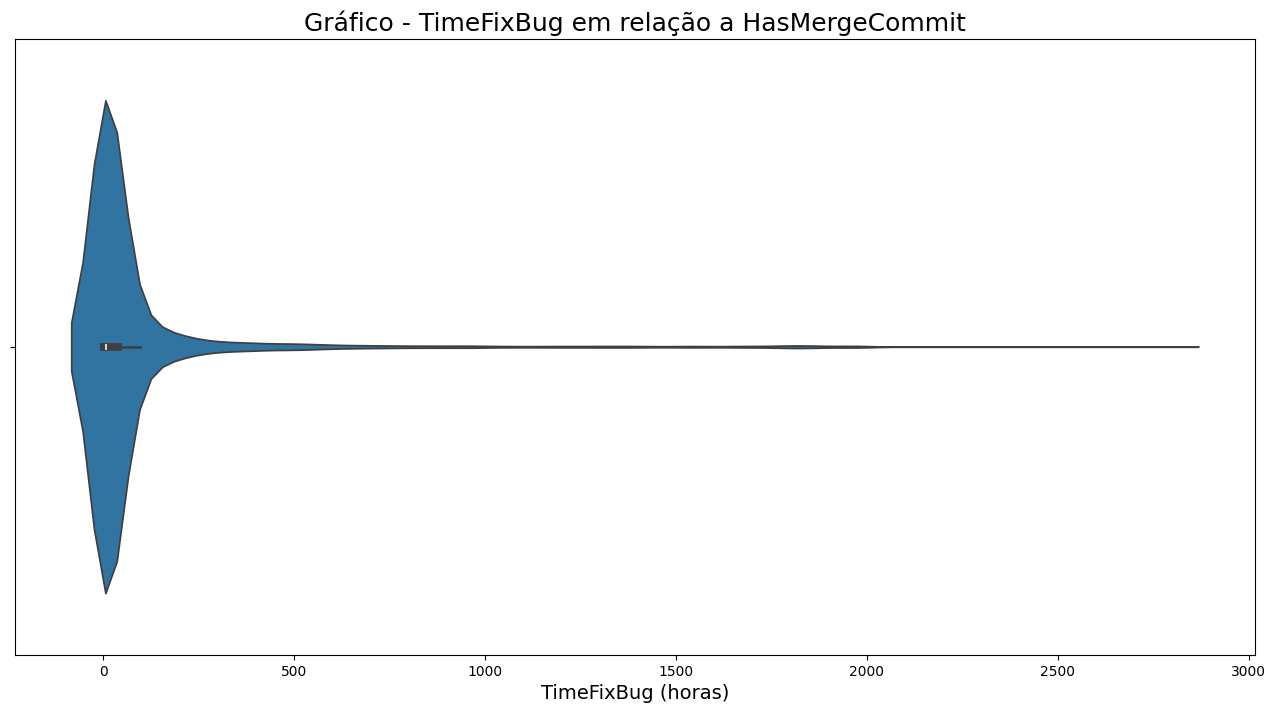

In [22]:
ax = sb.violinplot(x = 'TimeFixBug', data = snapshot_file)
ax.figure.set_size_inches(16, 8)
ax.set_xlabel('TimeFixBug (horas)', fontsize=14)
plt.title('Gráfico - TimeFixBug em relação a HasMergeCommit', fontsize=18)
plt.show()

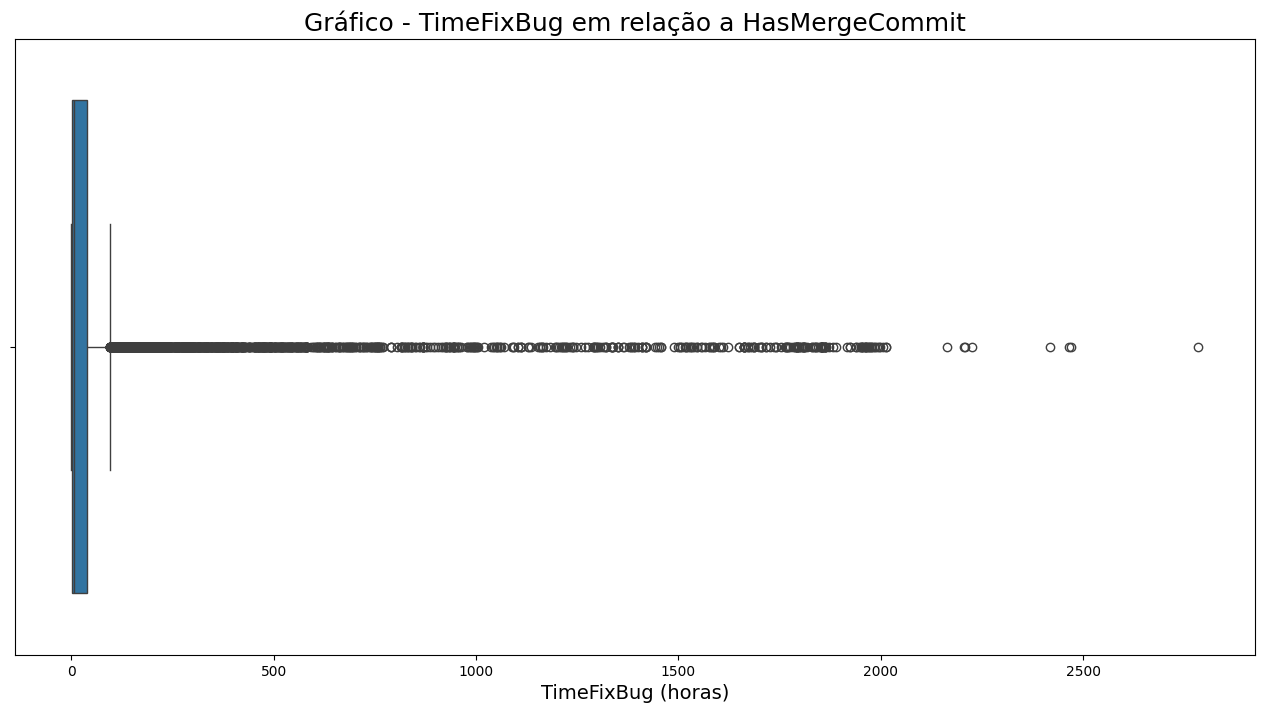

In [23]:
ax = sb.boxplot(x = 'TimeFixBug', data = snapshot_file)
ax.figure.set_size_inches(16, 8)
ax.set_xlabel('TimeFixBug (horas)', fontsize=14)
plt.title('Gráfico - TimeFixBug em relação a HasMergeCommit', fontsize=18)
plt.show()

##### Remoção de Outliers

Realizando o cálculo do intervalo interquartil: 936 - 24 = 912
Calculando o limite superior: 912 +(1.5 * 936) = 2316
Ou seja, tudo que for superior a 2316 é considerado outlier. Isso é equivalente a 97 dias, aproximadamente, de trabalho.

Realizando o cálculo do intervalo interquartil: 39 - 1 = 38
Calculando o limite superior: 38 + (1.5 * 38) = 95
Ou seja, tudo que for superior a 95 é considerado outlier, o que representa 95 dias.

In [24]:
snapshot_file_without_outlier = snapshot_file[snapshot_file.TimeFixBug <= 95] 

# C - index

In [29]:
final_list_of_contributors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1779 entries, 0 to 1778
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             1779 non-null   object
 1   name_git       221 non-null    object
 2   username_jira  1765 non-null   object
 3   name_jira      1766 non-null   object
dtypes: object(4)
memory usage: 55.7+ KB


In [41]:
comment_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159755 entries, 0 to 159754
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Project       159755 non-null  object
 1   Manager       159755 non-null  object
 2   Category      159755 non-null  object
 3   Key           159755 non-null  object
 4   Author        159755 non-null  object
 5   CreationDate  159755 non-null  object
 6   Content       157979 non-null  object
dtypes: object(7)
memory usage: 8.5+ MB


In [42]:
snapshot_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10375 entries, 0 to 10374
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   Project                    10375 non-null  object             
 1   Key                        10375 non-null  object             
 2   Priority                   10375 non-null  object             
 3   Status                     10375 non-null  object             
 4   Reporter                   10375 non-null  object             
 5   Assignee                   10375 non-null  object             
 6   Components                 7044 non-null   object             
 7   SummaryTopWords            10302 non-null  object             
 8   DescriptionTopWords        10004 non-null  object             
 9   CommentsTopWords           10359 non-null  object             
 10  CreationDate               10375 non-null  datetime64[ns, UTC]
 11  Re

In [39]:
len(comment_file.Key.unique())

10359

In [44]:
snapshot_file.shape

(10375, 45)

In [45]:
len(snapshot_file.Key.unique())

10375

Peso de Comentários

In [97]:
bug_per_comment = pd.merge(left=snapshot_file,
                           right=comment_file,
                           how="left",
                           on="Key")[["Key", "Author", "CreationDate_y"]]

In [98]:
number_comments_per_author_bug = duckdb.sql("""
                                        SELECT Key, Author, COUNT(*) AS 'NUMBER_COMMENTS'
                                        FROM bug_per_comment
                                        GROUP BY Key, Author
                                        """).df()

In [99]:
def cal_comments_weight(num_comments):
    w_comments = 0
    for index_comment in range(1, num_comments+1):
        w_comments += 2/math.sqrt(index_comment)
    return round(w_comments)

number_comments_per_author_bug["w_comments"] = number_comments_per_author_bug.NUMBER_COMMENTS.map(cal_comments_weight)

Peso de Commits

In [100]:
commits_per_author_bug = pd.merge(left=snapshot_file, right=commit_file, how="left", on="Key")[["Key", "Committer"]].dropna()

In [101]:
number_commits_per_author_bug = duckdb.sql("""
                                        SELECT Key, Committer, COUNT(*) AS 'NUMBER_COMMITS'
                                        FROM commits_per_author_bug
                                        GROUP BY Key, Committer
                                        """).df()

In [102]:
def cal_commits_weight(num_commits):
    w_commits = 0
    for index_commit in range(1, num_commits+1):
        w_commits += 5/math.sqrt(index_commit)
    return round(w_commits)

number_commits_per_author_bug["w_commits"] = number_commits_per_author_bug.NUMBER_COMMITS.map(cal_commits_weight)

Fator Tempo

In [103]:
time_per_bug = duckdb.sql("""
                           SELECT 
                              Key,
                              EXTRACT(YEAR FROM ResolutionDate) - 2018 AS DIFF_ANOS
                           FROM snapshot_file
                        """).df()

In [104]:
def cal_time_weight(DIFF_ANOS):
    return 0.95**abs(DIFF_ANOS)

time_per_bug["w_time"] = time_per_bug.DIFF_ANOS.map(cal_time_weight)

Calculando Score de Contribuição

In [111]:
number_commits_per_author_bug = number_commits_per_author_bug.rename(columns={"Committer": "Author"})

In [113]:
authors_bug_score = pd.merge(number_comments_per_author_bug, number_commits_per_author_bug, on=['Key', 'Author'], how='inner')


In [115]:
authors_bug_score = pd.merge(authors_bug_score, time_per_bug, on="Key", how="inner")

In [121]:
authors_bug_score["score_c"] = round(authors_bug_score["w_comments"] + authors_bug_score["w_commits"] * authors_bug_score["w_time"])

In [122]:
result = duckdb.sql("""
    WITH RankedScores AS (
        SELECT
            Author,
            score_c,
            ROW_NUMBER() OVER(PARTITION BY Author ORDER BY score_c DESC) AS rank
        FROM
            authors_bug_score
    ),
    CIndex AS (
        SELECT
            Author,
            MAX(rank) AS C_index
        FROM
            RankedScores
        WHERE
            rank <= score_c
        GROUP BY
            Author
    )
    SELECT
        abs.*,
        ci.C_index
    FROM
        authors_bug_score abs
    LEFT JOIN
        CIndex ci
    ON
        abs.Author = ci.Author
""").df()

In [124]:
result.C_index.describe()

count    7402.000000
mean       20.435018
std         5.173718
min         1.000000
25%        18.000000
50%        21.000000
75%        23.000000
max        32.000000
Name: C_index, dtype: float64

## Montar classificação dos desenvolvedores

In [127]:
categoria_engajamento_dev = []

committers = result["Author"].values
metric_engajament = result["C_index"].values

contribution_25 = result.C_index.quantile(0.25)
contribution_75 = result.C_index.quantile(0.75)

for i in range(0, len(committers)):
    if metric_engajament[i] <= contribution_25:
        categoria_engajamento_dev.append("Pouco Engajado")
    elif (metric_engajament[i] > contribution_25) and (metric_engajament[i] < contribution_75):
        categoria_engajamento_dev.append("Engajado")
    elif (metric_engajament[i] >= contribution_75):
        categoria_engajamento_dev.append("Muito Engajado")

zip_iterator = zip(committers, categoria_engajamento_dev)
a_dictionary = dict(zip_iterator)
result['Engagement'] = result['Author'].map(a_dictionary)

In [132]:
result = result[["Key", "Author", "Engagement"]].drop_duplicates().dropna()

In [134]:
result

,Key,Author,Engagement
0,YARN-2813,id905,Pouco Engajado
1,YARN-2815,id1271,Pouco Engajado
2,YARN-2834,id545,Muito Engajado
3,YARN-2846,id113,Muito Engajado
4,YARN-2853,id509,Muito Engajado
...,...,...,...
7397,YARN-1388,id884,Pouco Engajado
7398,YARN-1617,id884,Pouco Engajado
7399,YARN-1721,id884,Pouco Engajado
7400,YARN-1986,id884,Pouco Engajado
